# Imports

In [1]:
from __future__ import annotations
from typing import Optional

import math
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

# Helper functions

In [2]:
EARTH_RADIUS = 6371

In [3]:
def distance(first_city_data: pd.Series, second_city_data: pd.Series) -> float:
    """
    Calculate the distance between two cities using longitude and latitude values.
    
    Args:
        first_city_data: pd.Series - first city's longitude and latitude.
        second_city_data: pd.Series - second city's longitude and latitude.
    
    Returns:
        float - distance between these cities.
    """

    lat1, lon1 = first_city_data['geo_lat'], first_city_data['geo_lon']
    lat2, lon2 = second_city_data['geo_lat'], second_city_data['geo_lon']
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(
        math.radians(lat1)) * math.cos(
        math.radians(lat2)) * math.sin(dlon / 2) * math.sin(dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = EARTH_RADIUS * c

    return d

In [4]:
def total_distance(path: list[int], cities: pd.DataFrame) -> float:
    """
    Calculate total path's distance as sum of distances between adjacent cities.
    
    Args:
        path: list[int] - current path represented as a list of cities' indexes.
        cities: pd.DataFrame - cities dataframe.
    
    Returns:
        float - total distance.
    """

    return sum(distance(cities.iloc[path[i]], cities.iloc[path[(i + 1) % len(path)]]) for i in range(len(path)))

# Read the data

In [5]:
df = pd.read_csv('city.csv')

In [6]:
df.head()

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
0,"Респ Адыгея, г Адыгейск",385200.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Адыгейск,...,4,0,79403000000,79703000001,107,UTC+3,44.878414,39.190289,12689,1969
1,г Майкоп,385000.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Майкоп,...,4,2,79401000000,79701000001,105,UTC+3,44.609827,40.100661,144055,1857
2,г Горно-Алтайск,649000.0,Россия,Сибирский,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,...,4,2,84401000000,84701000001,400,UTC+7,51.958103,85.960324,62861,1830
3,"Алтайский край, г Алейск",658125.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Алейск,...,4,0,1403000000,1703000001,2201,UTC+7,52.492251,82.779361,28528,1913
4,г Барнаул,656000.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Барнаул,...,4,2,1401000000,1701000001,2200,UTC+7,53.347997,83.779806,635585,1730


In [7]:
df.columns

Index(['address', 'postal_code', 'country', 'federal_district', 'region_type',
       'region', 'area_type', 'area', 'city_type', 'city', 'settlement_type',
       'settlement', 'kladr_id', 'fias_id', 'fias_level', 'capital_marker',
       'okato', 'oktmo', 'tax_office', 'timezone', 'geo_lat', 'geo_lon',
       'population', 'foundation_year'],
      dtype='object')

In [8]:
df.population

0        12689
1       144055
2        62861
3        28528
4       635585
         ...  
1112     31791
1113    200771
1114     41001
1115     34505
1116    591486
Name: population, Length: 1117, dtype: int64

In [9]:
# Consider only 30 most populated cities
df = df.sort_values(by='population', ascending=False).iloc[:30]

In [10]:
len(df)

30

In [11]:
df.head(30)

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
509,г Москва,101000.0,Россия,Центральный,г,Москва,NaN,NaN,NaN,NaN,...,1,0,45000000000,45000000,7700,UTC+3,55.754047,37.620405,11514330,1147
786,г Санкт-Петербург,190000.0,Россия,Северо-Западный,г,Санкт-Петербург,NaN,NaN,NaN,NaN,...,1,0,40000000000,40000000,7800,UTC+3,59.939131,30.315900,4848742,1703
647,г Новосибирск,630000.0,Россия,Сибирский,обл,Новосибирская,NaN,NaN,г,Новосибирск,...,4,2,50401000000,50701000001,5400,UTC+7,55.028191,82.921149,1498921,1893
832,г Екатеринбург,620000.0,Россия,Уральский,обл,Свердловская,NaN,NaN,г,Екатеринбург,...,4,2,65401000000,65701000001,6600,UTC+5,56.838522,60.605491,1377738,1723
619,г Нижний Новгород,603000.0,Россия,Приволжский,обл,Нижегородская,NaN,NaN,г,Нижний Новгород,...,4,2,22401000000,22701000001,5200,UTC+3,56.324063,44.005391,1250615,1221
927,г Казань,420000.0,Россия,Приволжский,Респ,Татарстан,NaN,NaN,г,Казань,...,4,2,92401000000,92701000001,1600,UTC+3,55.794358,49.111497,1216965,1005
782,г Самара,443000.0,Россия,Приволжский,обл,Самарская,NaN,NaN,г,Самара,...,4,2,36401000000,36701000,6300,UTC+4,53.195031,50.106952,1164900,1586
656,г Омск,644000.0,Россия,Сибирский,обл,Омская,NaN,NaN,г,Омск,...,4,2,52401000000,52701000001,5500,UTC+6,54.984857,73.367452,1154000,1716
1064,г Челябинск,454000.0,Россия,Уральский,обл,Челябинская,NaN,NaN,г,Челябинск,...,4,2,75401000000,75701000001,7400,UTC+5,55.160262,61.400808,1130273,1736
757,г Ростов-на-Дону,344000.0,Россия,Южный,обл,Ростовская,NaN,NaN,г,Ростов-на-Дону,...,4,2,60401000000,60701000001,6100,UTC+3,47.222457,39.718803,1091544,1749


# Simulated Annealing algorithm

In [12]:
def simulated_annealing(
    cities: pd.DataFrame, 
    initial_temp: float, 
    cooling_rate: float, 
    min_temp: Optional[float] = 10,
) -> tuple[list[list[int]], list[float]]:
    """
    Run the Simulated Annealing algorithm.

    Args:
        cities: pd.DataFrame - cities dataframe.
        initial_temp: float - initial temperature for the annealing process.
        cooling_rate: float - rate at which the temperature decreases during the annealing process.
        min_temp: Optional[float] - minimal temperature (used as a algorithm's stopping criterion).
            Defaults to 10.

    Returns:
        tuple[list[list[int]], list[float]]: tuple containing resulting paths after each algorithm's iteration and
            corresponding cost values (total distances).
    """

    # Set the current temperature to the initial temperature value
    current_temp = initial_temp
    
    # Initialize the current path cities' indexes list
    current_path = list(range(len(cities)))
    
    # Compute current path's cost value
    current_cost = total_distance(current_path, cities)
    
    resulting_paths = [current_path]
    resulting_costs = [current_cost]
    
    # Loop until the temperature reaches a minimal temperature value
    while current_temp > min_temp:

        # Generate a new route by swapping two random cities in the current route
        new_path = current_path.copy()
        i, j = random.sample(range(len(new_path)), 2)
        new_path[i], new_path[j] = new_path[j], new_path[i]
        
        # Calculate the new path's cost
        new_cost = total_distance(new_path, cities)
        
        # Calculate the costs difference between the new and current path
        delta_cost = new_cost - current_cost
        
        # Check whether to accept the new path
        if random.random() <= math.exp(-delta_cost / current_temp):
            current_path = new_path.copy()
            current_cost = new_cost
                
        # Decrease the temperature by specified multiplier
        current_temp *= cooling_rate
        
        # Record resulting path and cost
        resulting_paths.append(current_path)
        resulting_costs.append(current_cost)
    
    return resulting_paths, resulting_costs

### Run the algorithm

In [13]:
params = {
    'fast': {
        'initial_temp': 3000,
        'cooling_rate': 0.6,
        'min_temp': 15,
    },
    'middle': {
        'initial_temp': 3000,
        'cooling_rate': 0.8,
        'min_temp': 15,
    },
    'slow': {
        'initial_temp': 3000,
        'cooling_rate': 0.99,
        'min_temp': 15,
    },
}

results = {
    'fast': [],
    'middle': [],
    'slow': [],
}

# This dictionary is required for animation purposes (because in previous dictionary, averaging is done)
last_iter_results = {
    'fast': {
        'paths': None,
        'costs': None,
    },
    'middle': {
        'paths': None,
        'costs': None,
    },
    'slow': {
        'paths': None,
        'costs': None,
    },
}

In [14]:
# Fix random seed
random.seed(28)

In [15]:
for mode in ('fast', 'middle', 'slow'):
    
    # Averaging over 20 runs to show more robust statistics
    for i in tqdm(range(20), desc=f"Running the Simulated Annealing algorithm with mode {mode}"):
        res_paths, res_costs = simulated_annealing(df, **params[mode])
        results[mode].append(res_costs)
    results[mode] = np.array(results[mode]).mean(axis=0)
    last_iter_results[mode]['paths'] = res_paths
    last_iter_results[mode]['costs'] = res_costs

Running the Simulated Annealing algorithm with mode fast: 100%|█████████████████████████| 20/20 [00:00<00:00, 24.28it/s]
Running the Simulated Annealing algorithm with mode middle: 100%|███████████████████████| 20/20 [00:01<00:00, 11.65it/s]
Running the Simulated Annealing algorithm with mode slow: 100%|█████████████████████████| 20/20 [00:34<00:00,  1.74s/it]


### Plot the results

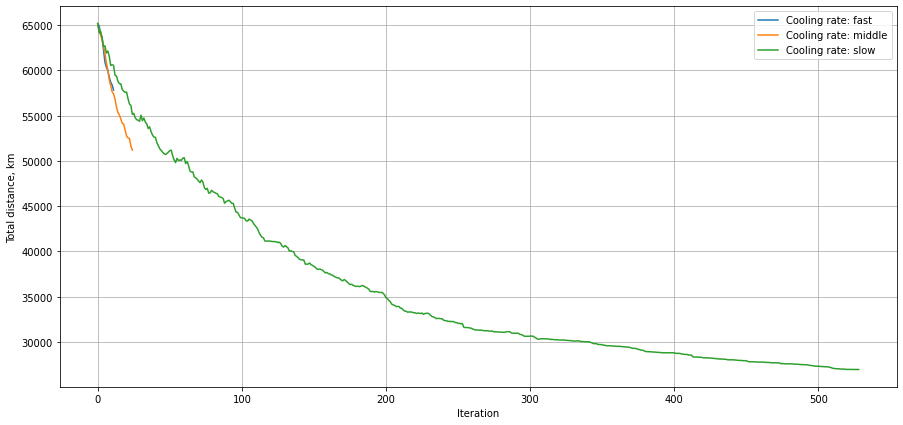

In [16]:
fig = plt.figure(figsize=(15, 7))
for mode, res in results.items():
    plt.plot(res, label=f'Cooling rate: {mode}')
    
plt.xlabel('Iteration')
plt.ylabel('Total distance, km')
plt.legend()
plt.grid()
plt.show()

In [17]:
# Save figure to disk
fig.savefig('sa_results.png')

# Optimization process animation

In [21]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [26]:
def animate(
    paths_history: list[list[int]], costs_history: list[float], cities: pd.DataFrame
) -> FuncAnimation:

    # Initialize the canvas
    fig, ax = plt.subplots(figsize=(15, 15))
    
    # Denote cities as black points
    ax.scatter(cities['geo_lon'], cities['geo_lat'], color='black', s=100)
    
    # Create the line object instance (for edges drawing)
    line, = ax.plot([], [], color='purple', alpha=0.5)
    
    # Animation's `update` function
    def update(frame):

        # Get the current path and its total distance (cost) given iteration number
        current_path = paths_history[frame]
        current_cost = costs_history[frame]
        
        # Draw the retrieved path
        x = cities.iloc[current_path]['geo_lon'].tolist() + [cities.iloc[current_path[0]]['geo_lon']]
        y = cities.iloc[current_path]['geo_lat'].tolist() + [cities.iloc[current_path[0]]['geo_lat']]
        line.set_data(x, y)
        
        ax.set_xlim(cities['geo_lon'].min() - 3, cities['geo_lon'].max() + 3)
        ax.set_ylim(cities['geo_lat'].min() - 3, cities['geo_lat'].max()+ 3)
        ax.set_title(f'Iteration {frame}, total distance = {current_cost:.3f} km')
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.xaxis.grid(True, which='major')
        ax.yaxis.grid(True, which='major')
        
        return line
    
    # Create and return the animation object
    return FuncAnimation(fig, update, frames=len(paths_history), interval=100, blit=False)

### Fast cooling

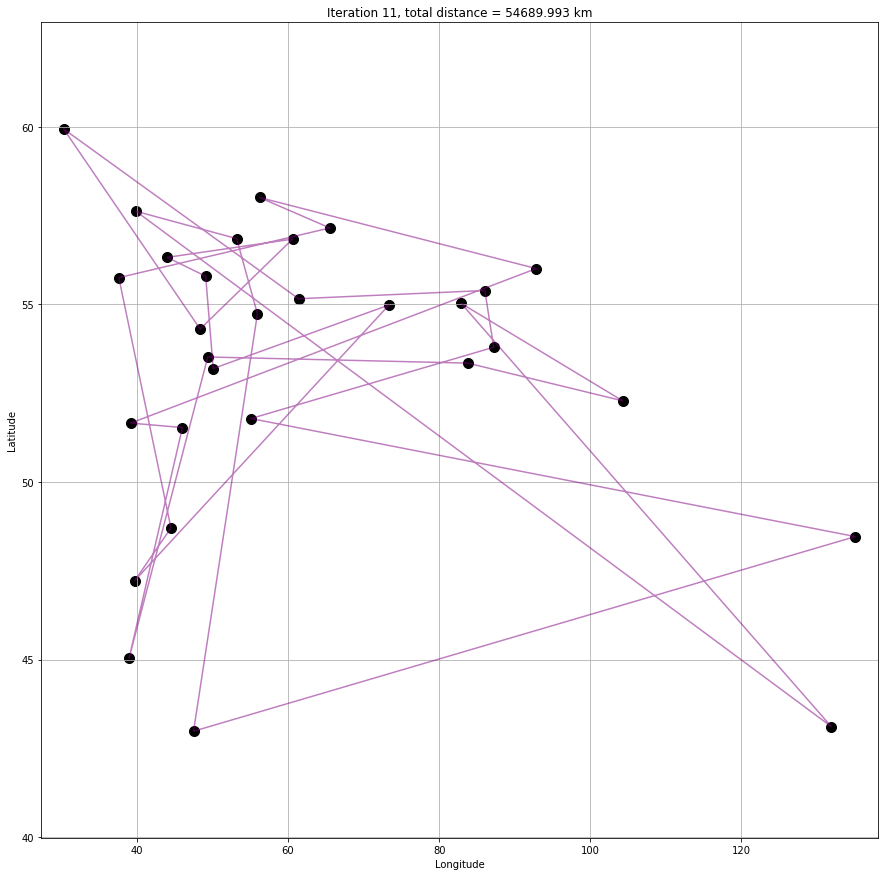

In [27]:
anim = animate(last_iter_results['fast']['paths'], last_iter_results['fast']['costs'], df)

# Display the animation
HTML(anim.to_html5_video())

### Middle cooling

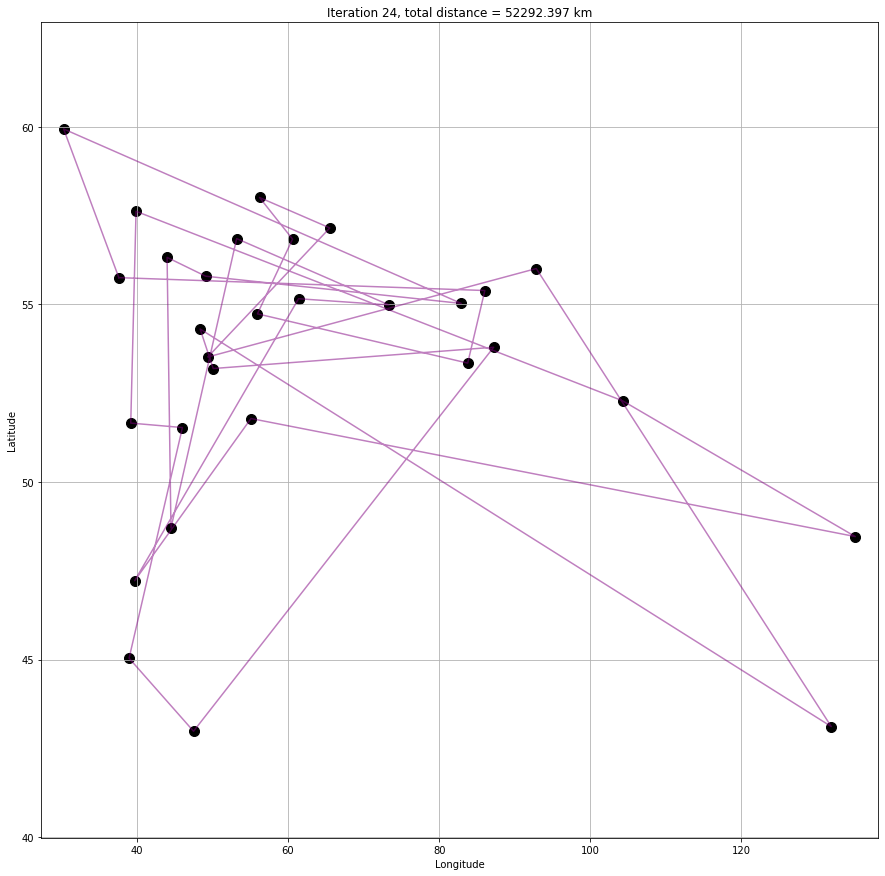

In [28]:
anim = animate(last_iter_results['middle']['paths'], last_iter_results['middle']['costs'], df)

# Display the animation
HTML(anim.to_html5_video())

### Slow cooling

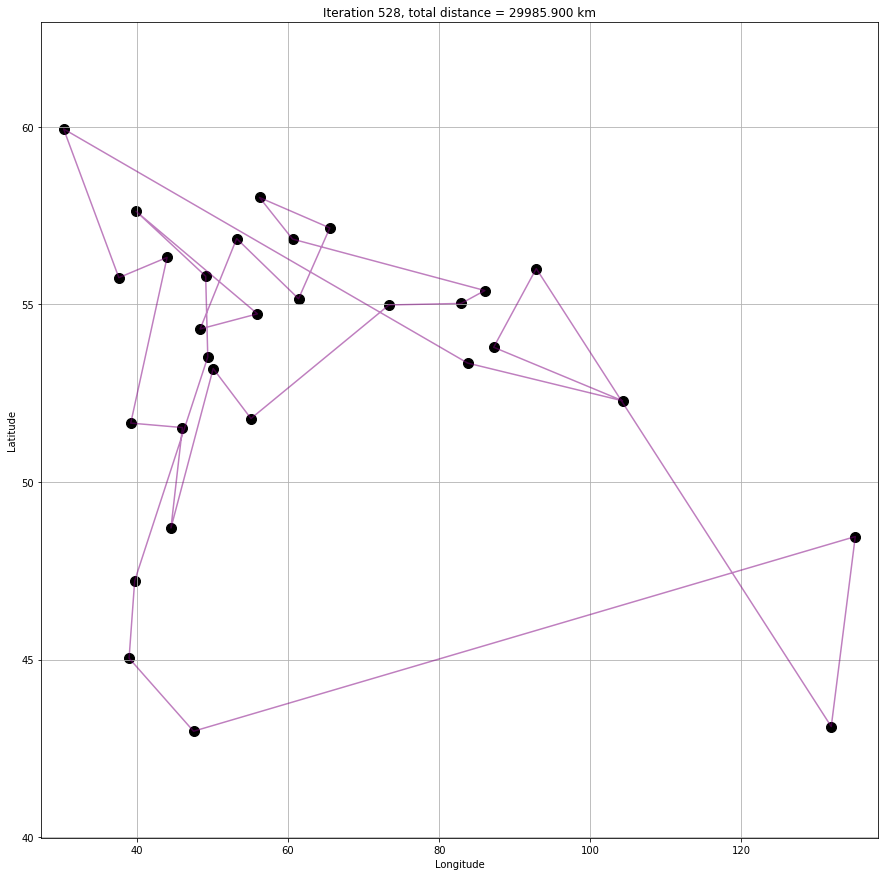

In [29]:
anim = animate(last_iter_results['slow']['paths'], last_iter_results['slow']['costs'], df)

# Display the animation
HTML(anim.to_html5_video())